In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization ,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier 
from keras import optimizers
from math import floor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
import warnings
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
import functools
import matplotlib.pyplot as plt
import traceback 
import contextlib
import seaborn as sns
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
LeakyReLU = LeakyReLU(alpha=0.1)
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
score_acc = make_scorer(accuracy_score)

In [3]:
SGD = tf.keras.optimizers.SGD
Adam = tf.keras.optimizers.Adam
RMSprop = tf.keras.optimizers.RMSprop
Adadelta=tf.keras.optimizers.Adadelta
Adagrad=tf.keras.optimizers.Adagrad
Nadam=tf.keras.optimizers.Nadam
Ftrl=tf.keras.optimizers.Ftrl
Adamax = tf.keras.optimizers.Adamax

In [4]:
bladder_cancer = pd.read_csv('bladder_cancer.csv')

x = pd.DataFrame(bladder_cancer, columns=['Amp_1MHz', 'Phase_1MHz', 'Amp_500kHz', 'Phase_500kHz', 'Amp_100kHz', 'Phase_100kHz', 'Amp_50kHz', 'Phase_50kHz', 'Amp_10kHz', 'Phase_10kHz'])

y = pd.DataFrame(bladder_cancer, columns=['Label'])

x_mean = x.mean()
x_std = x.std()
x = (x-x_mean)/x_std

x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=1) 
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
x_train

array([[-0.70212259,  0.87691791,  1.3089513 , ...,  0.29837007,
         0.38672978,  0.01241453],
       [-2.75649426,  1.09072906, -0.89399574, ...,  0.17062017,
        -0.58008862,  0.68077064],
       [ 0.24532515, -0.38633226, -0.58649158, ...,  0.37028141,
        -1.44227513,  1.10491147],
       ...,
       [-1.18210733, -0.99929518, -1.63580168, ..., -0.66027891,
         1.69482415,  1.15727325],
       [ 1.39072348, -0.85021045, -2.14404835, ...,  0.35723112,
         0.05855178,  0.78050842],
       [ 1.37015955,  0.36935711,  0.63271442, ...,  0.22917919,
        -1.16423879,  0.0284987 ]])

In [29]:
model = tf.keras.Sequential([
   
   layers.Dense(20, activation='relu'),
   layers.Dense(130, activation='relu'),
   layers.Dense(130, activation='relu'),
   layers.Dense(130, activation='relu'),
   layers.Dense(1, activation='sigmoid')

])

model.compile(loss= 'binary_crossentropy',
                optimizer = tf.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, epochs=200, batch_size=10, validation_data=(x_val, y_val), verbose=1)

Epoch 1/200
17/17 [==============================] - 0s 7ms/step - loss: 0.6976 - accuracy: 0.4556 - val_loss: 0.6895 - val_accuracy: 0.6279
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6095 - val_loss: 0.6824 - val_accuracy: 0.7209
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6864 - val_loss: 0.6755 - val_accuracy: 0.7442
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.7396 - val_loss: 0.6683 - val_accuracy: 0.7674
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7574 - val_loss: 0.6604 - val_accuracy: 0.7442
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.7751 - val_loss: 0.6519 - val_accuracy: 0.7674
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7870 - val_loss: 0.6423 - val_accuracy: 0.7674
Epoch 8/200
1

In [31]:
model.evaluate(x_train,  y_train, verbose=2)
model.evaluate(x_val,  y_val, verbose=2)
model.evaluate(x_test,  y_test, verbose=2)

prediction = model.predict(x_test[:1])
print(prediction)

6/6 - 0s - loss: 9.7893e-04 - accuracy: 1.0000 - 15ms/epoch - 3ms/step
2/2 - 0s - loss: 0.9427 - accuracy: 0.7907 - 13ms/epoch - 7ms/step
1/1 - 0s - loss: 0.4533 - accuracy: 0.8750 - 13ms/epoch - 13ms/step
[[0.6617256]]


In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

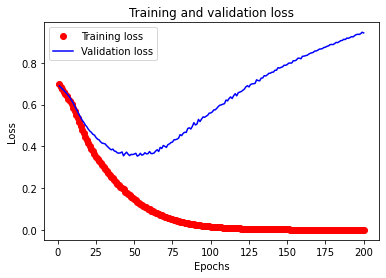

In [33]:


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'ro', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() 

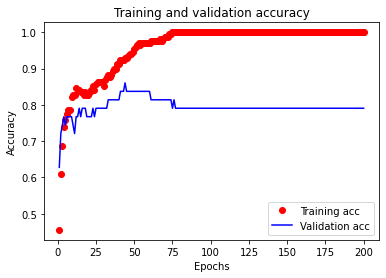

In [34]:
plt.clf()  

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
#링크 따라함

def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, layers3, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    layers3 = round(layers3)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        for i in range(layers3):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, x_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [17]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(10, 100),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'layers3':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  |  layers3  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.5205   |  5.51     |  25.22    |  0.4361   |  0.2308   |  43.63    |  1.298    |  1.045    |  1.84     |  0.2463   |  40.39    |  0.9907   |  1.664    |
|  2        |  0.5561   |  0.7307   |  70.26    |  0.6212   |  0.08228  |  57.3     |  1.237    |  1.148    |  2.802    |  0.796    |  85.65    |  0.8152   |  6.937    |
|  3        |  0.5203   |  5.195    |  83.24    |  0.4213   |  0.008234 |  56.33    |  1.211    |  2.634    |  2.395    |  0.5696   |  34.68    |  0.9985   |  0.9663   |
|  4        |  0.5561   |  5.539    |  53.65    |  0.405    |  0.2184   |  45.83    |  1.801    |  1.638    |  2.894    |  0.9195   |  83.25    |  0.0

In [20]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['layers3'] = round(params_nn_['layers3'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'relu',
 'batch_size': 76,
 'dropout': 0.49825688590516326,
 'dropout_rate': 0.06542015311651879,
 'epochs': 21,
 'layers1': 3,
 'layers2': 2,
 'layers3': 2,
 'learning_rate': 0.6649346020474,
 'neurons': 85,
 'normalization': 0.38819534793782673,
 'optimizer': <keras.optimizer_v2.adadelta.Adadelta at 0x241f2b74370>}

In [21]:
def nn_cl_fun():

    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=10, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
            nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
            nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
            nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
            nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    for i in range(params_nn_['layers3']):
            nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)
nn.fit(x_train, y_train, validation_data=(x_val, y_val), verbose=1)

Epoch 1/21
3/3 [==============================] - 1s 62ms/step - loss: 0.6909 - accuracy: 0.5740 - val_loss: 0.6858 - val_accuracy: 0.7209
Epoch 2/21
3/3 [==============================] - 0s 9ms/step - loss: 0.6833 - accuracy: 0.6923 - val_loss: 0.6734 - val_accuracy: 0.7209
Epoch 3/21
3/3 [==============================] - 0s 10ms/step - loss: 0.6709 - accuracy: 0.7160 - val_loss: 0.6588 - val_accuracy: 0.6977
Epoch 4/21
3/3 [==============================] - 0s 11ms/step - loss: 0.6513 - accuracy: 0.7633 - val_loss: 0.6222 - val_accuracy: 0.7907
Epoch 5/21
3/3 [==============================] - 0s 9ms/step - loss: 0.6102 - accuracy: 0.8047 - val_loss: 0.5767 - val_accuracy: 0.7209
Epoch 6/21
3/3 [==============================] - 0s 10ms/step - loss: 0.5615 - accuracy: 0.7456 - val_loss: 0.4986 - val_accuracy: 0.8605
Epoch 7/21
3/3 [==============================] - 0s 10ms/step - loss: 0.4802 - accuracy: 0.7988 - val_loss: 0.6238 - val_accuracy: 0.6047
Epoch 8/21
3/3 [=============

In [22]:
nn.score(x_train, y_train), nn.score(x_val,  y_val), nn.score(x_test,  y_test)

(0.9940828680992126, 0.8604651093482971, 0.875)

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18291778655749246175
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5750390784
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3090081284801928998
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]